In [230]:
import pandas as pd
import numpy as np
import joblib
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor

In [231]:
traindata=pd.read_csv("/content/dataset.csv")
traindata

<ipython-input-231-691b0356f00d>:1: DtypeWarning: Columns (804) have mixed types. Specify dtype option on import or set low_memory=False.
  traindata=pd.read_csv("/content/dataset.csv")


,Unnamed: 0,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,0,16,20,0,48,41472,257790,0,12,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1.593396e+09,ixnetwork-traffic-start,0.0
1,1,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1.593396e+09,ixnetwork-traffic-start,0.0
2,2,16,20,0,48,41472,257790,0,12,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1.593396e+09,ixnetwork-traffic-start,0.0
3,3,16,20,0,48,41472,257790,0,12,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1.593396e+09,ixnetwork-traffic-start,0.0
4,4,16,20,0,48,41472,257790,0,12,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1.593396e+09,ixnetwork-traffic-start,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,9665,16,20,0,48,41472,257790,0,12,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9799,9666,16,20,0,48,41472,257790,0,12,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9800,9667,16,20,0,48,41472,257790,0,12,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9801,9668,16,20,0,48,41472,257790,0,12,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,12.0


In [232]:
traindata.shape

(9803, 1000)

In [233]:
traindata['v_type_code'].value_counts()

6.0     1810
5.0     1774
8.0     1751
7.0     1710
3.0      559
4.0      559
10.0     462
9.0      456
11.0     228
12.0     227
1.0      130
2.0      130
0.0        6
Name: v_type_code, dtype: int64

In [234]:
traindata.isnull().sum()

Unnamed: 0                                                          0
p_/computes0/service/id                                             0
p_/computes0/vcpus_used                                             0
p_/computes0/local_gb_used                                          0
p_/computes0/vcpus                                                  0
                                                                   ..
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error    1
v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate     1
v_/time                                                             1
v_type                                                              1
v_type_code                                                         1
Length: 1000, dtype: int64

In [235]:
# drop unnamed column
traindata.drop(columns=['Unnamed: 0'], inplace=True)

In [236]:
traindata

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time,v_type,v_type_code
0,16,20,0,48,41472,257790,0,12,2,2,...,0.100425,174853276.0,11.431817,1263588.0,0.0,0.0,0.099783,1.593396e+09,ixnetwork-traffic-start,0.0
1,16,20,0,48,41472,257790,0,12,2,2,...,0.099506,174854074.0,13.313681,1263595.0,0.0,0.0,0.116705,1.593396e+09,ixnetwork-traffic-start,0.0
2,16,20,0,48,41472,257790,0,12,2,2,...,0.099506,174854758.0,13.313681,1263601.0,0.0,0.0,0.100463,1.593396e+09,ixnetwork-traffic-start,0.0
3,16,20,0,48,41472,257790,0,12,2,2,...,0.099826,174855556.0,13.277844,1263608.0,0.0,0.0,0.116223,1.593396e+09,ixnetwork-traffic-start,0.0
4,16,20,0,48,41472,257790,0,12,2,2,...,0.116494,174856338.0,13.277844,1263615.0,0.0,0.0,0.116614,1.593396e+09,ixnetwork-traffic-start,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,16,20,0,48,41472,257790,0,12,2,2,...,0.100107,243309818.0,11.436646,1381634.0,0.0,0.0,0.100265,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9799,16,20,0,48,41472,257790,0,12,2,2,...,0.116461,243310502.0,11.345642,1381640.0,0.0,0.0,0.100331,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9800,16,20,0,48,41472,257790,0,12,2,2,...,0.099810,243311186.0,11.412337,1381646.0,0.0,0.0,0.099995,1.593977e+09,ixnetwork-bgp-hijacking-start,11.0
9801,16,20,0,48,41472,257790,0,12,2,2,...,0.100395,243311984.0,13.306911,1381653.0,0.0,0.0,0.116647,1.593977e+09,ixnetwork-bgp-hijacking-stop,12.0


In [237]:
data_drop_index = traindata[traindata['v_type_code']== 0].index.tolist()
traindata.drop(index=data_drop_index, axis=0, inplace=True)

In [238]:
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 0 if x == 1 or x == 2 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 1 if x == 3 or x == 4 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 2 if x == 5 or x == 6 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 3 if x == 7 or x == 8 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 4 if x == 9 or x == 10 else x)
traindata['v_type_code'] = traindata['v_type_code'].apply(lambda x: 5 if x == 11 or x == 12 else x)

In [239]:
traindata= traindata.dropna(subset=['v_type_code'])

In [240]:
traindata=traindata.drop(['v_type'], axis=1)

In [241]:
traintarget=traindata['v_type_code']
traindata=traindata.drop(['v_type_code'], axis=1)

In [242]:
all_columns = traindata.columns.tolist()


In [243]:
from sklearn.preprocessing import MinMaxScaler
all_columns = traindata.columns.tolist()
scaler = MinMaxScaler()
traindata[all_columns] = scaler.fit_transform(traindata[all_columns])


In [244]:
traindata

,p_/computes0/service/id,p_/computes0/vcpus_used,p_/computes0/local_gb_used,p_/computes0/vcpus,p_/computes0/memory_mb_used,p_/computes0/memory_mb,p_/computes0/current_workload,p_/computes0/cpu_info/topology/cores,p_/computes0/cpu_info/topology/cells,p_/computes0/cpu_info/topology/threads,...,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-drop,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-error,v_/ports#link-tr-tr-a-1-y/metrics/network-outgoing-packets-rate,v_/time
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000444,0.000000,0.000019,0.000000,0.0,0.0,0.000200,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000507,0.000010,0.000030,0.000051,0.0,0.0,0.000297,0.000103
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000379,0.000024,0.000019,0.000110,0.0,0.0,0.000233,0.000206
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000506,0.000037,0.000026,0.000178,0.0,0.0,0.000265,0.000310
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000444,0.000047,0.000026,0.000229,0.0,0.0,0.000199,0.000413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000380,0.999958,0.000019,0.999788,0.0,0.0,0.000200,0.999587
9799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000442,0.999968,0.000019,0.999839,0.0,0.0,0.000200,0.999690
9800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000379,0.999978,0.000019,0.999890,0.0,0.0,0.000199,0.999794
9801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000381,0.999990,0.000022,0.999949,0.0,0.0,0.000232,0.999897


#List of selected features

In [245]:
from google.colab import files
with open('/content/selected_features_larger.txt', 'r') as file:
    text_content = file.read()

    # Split the text into a list using commas as delimiters
    text_list = text_content.split(',')

    # Remove leading and trailing whitespace from each element
    features_selected = [element.strip() for element in text_list]

    # Print the resulting list
    print(features_selected)



['n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/out-octets', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-octets', 'v_/ports#TR-02/metrics/network-incoming-bytes', 'v_/devices#IntGW-01/metrics/disk-write-requests', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/out-forwarded-pkts', 'n_/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/out-octets', 'v_/ports#link-intgw-exgw-b-3-x/metrics/network-outgoing-bytes-rate', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives', 'v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets', 'v_/ports#link-intgw-ip-a-2-x/metrics/network-incoming-bytes', 'v_/devices#RR-01/metrics/cpu', 'v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes-rate', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/diffserv-info/diffserv

In [246]:
print(len(features_selected))

250


In [247]:
features_selected.remove('')

In [248]:
features_selected[0]

'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/out-octets'

In [249]:
for i in features_selected:
  if(i[0]=='U'):
    features_selected.remove(i)

In [250]:
filtered_train_data= traindata[features_selected]
filtered_train_data

,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/out-octets,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-octets,v_/ports#TR-02/metrics/network-incoming-bytes,v_/devices#IntGW-01/metrics/disk-write-requests,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/v4-protocol-stats/out-forwarded-pkts,n_/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/out-octets,v_/ports#link-intgw-exgw-b-3-x/metrics/network-outgoing-bytes-rate,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives,v_/ports#link-tr-tr-a-1-y/metrics/network-incoming-packets,v_/ports#link-intgw-ip-a-2-x/metrics/network-incoming-bytes,...,n_/devices/modules/Cisco-IOS-XE-memory-oper/memory-statistics/memory-statistic/used-memory,v_/ports#link-intgw-exgw-a-3-x/metrics/network-outgoing-bytes,v_/ports#link-tr-intgw-a-1-x/metrics/network-outgoing-packets,v_/ports#link-intgw-exgw-b-1-x/metrics/network-incoming-packets,p_/computes0/metrics/hardware-disk#nvme0n1/hardware-disk-read-requests,v_/ports#link-intgw-exgw-b-3-x/metrics/network-outgoing-bytes,n_/devices/modules/openconfig-interfaces/interfaces/interface/subinterfaces/subinterface/state/last-change,p_/computes0/metrics/hardware-ipmi-current#power_meter_(0x43)/hardware-ipmi-current,v_/ports#link-intgw-exgw-a-1-x/metrics/network-outgoing-bytes-rate,v_/ports#link-tr-intgw-b-3-x/metrics/network-outgoing-bytes
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.328324,0.973460,0.999061,0.000000,0.0,...,0.672842,0.000000,0.000000e+00,0.000000,0.0,0.000000,1.000000e+00,0.461538,0.983630,0.000000
7,0.000082,0.000042,0.000204,0.000000,0.000084,0.328970,0.990428,0.999296,0.000054,0.0,...,0.672842,0.000000,4.519229e-09,0.000106,0.0,0.000109,1.000000e+00,0.153846,0.000000,0.000016
8,0.000164,0.000077,0.000303,0.000000,0.000168,0.329616,0.991128,0.999530,0.000125,0.0,...,0.672842,0.000000,9.038459e-09,0.000208,0.0,0.000218,1.000000e+00,0.076923,0.000000,0.000039
9,0.000246,0.000112,0.000411,0.000000,0.000252,0.330262,0.997539,0.999530,0.000188,0.0,...,0.822791,0.000000,1.431089e-08,0.000314,0.0,0.000327,1.000000e+00,0.000000,0.000000,0.000060
10,0.000328,0.000148,0.000515,0.000000,0.000336,0.330909,0.987381,1.000000,0.000251,0.0,...,0.751801,0.000000,1.883012e-08,0.000418,0.0,0.000436,1.000000e+00,0.000000,0.000000,0.000076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,0.999672,0.999861,0.999598,0.999627,0.999665,0.202355,0.994794,0.109181,0.999776,1.0,...,0.705578,0.999568,9.995762e-01,0.999581,1.0,0.999565,4.956746e-11,0.461538,0.993491,0.999918
9799,0.999754,0.999897,0.999699,0.999689,0.999748,0.203001,0.986367,0.109181,0.999839,1.0,...,0.780474,0.999677,9.996821e-01,0.999687,1.0,0.999674,6.218670e-11,0.461538,0.983563,0.999937
9800,0.999836,0.999933,0.999797,0.999938,0.999832,0.203647,0.991080,0.109415,0.999893,1.0,...,0.780474,0.999781,9.997880e-01,0.999790,1.0,0.999783,1.290346e-10,0.461538,0.988476,0.999956
9801,0.999918,0.999966,0.999896,1.000000,0.999916,0.204294,0.990818,0.109650,0.999946,1.0,...,0.780474,0.999890,9.998940e-01,0.999895,1.0,0.999892,1.274429e-10,0.384615,0.990665,0.999979


In [251]:
filtered_train_data.shape

(9796, 249)

##XGBoost Importance

In [252]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_train_data, traintarget, test_size=0.2, random_state=42)

# Create an XGBoost classifier for multiclass classification
xgb_model = xgb.XGBClassifier(objective='multi:softprob', num_class=5)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': filtered_train_data.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Get the top 15 feature names as a list
top_15_feature_names = feature_importance_df['Feature'][:15].tolist()

# Print the top 15 feature names
print(top_15_feature_names)


['n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/tx-pps', 'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/tx-kbps', 'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-

In [253]:
filtered_train_data= traindata[top_15_feature_names]
filtered_train_data

,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/tx-pps,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/tx-kbps,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/current-prefixes,p_/computes0/metrics/hardware/hardware-memory-buffer,p_/computes0/metrics/hardware-ipmi-temperature#28-p_s_2_zone_(0x1e)/hardware-ipmi-temperature,n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/transport/foreign-port,p_/computes0/metrics/hardware/hardware-cpu-load-15min,n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/in-octets,n_/devices/modules/openconfig-interfaces/interfaces/interface/state/counters/last-clear
6,1.000000,0.975185,0.998853,0.998853,0.979476,0.999061,0.928571,0.902655,0.895941,0.812389,0.8,0.003874,0.254355,0.000000,1.000000e+00
7,1.000000,0.975185,0.999082,0.999083,0.979482,0.999296,0.928571,0.902655,0.895941,0.812540,0.8,0.003874,0.238676,0.000042,1.000000e+00
8,1.000000,0.975185,0.999312,0.999312,0.979487,0.999530,0.928571,0.902655,0.895941,0.812600,0.6,0.003874,0.238676,0.000077,1.000000e+00
9,1.000000,0.991728,0.999771,0.999771,0.993670,0.999530,0.928571,0.898230,0.895941,0.812789,0.6,0.003874,0.189895,0.000112,1.000000e+00
10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.928571,0.898230,0.895941,0.812926,0.4,0.003874,0.172474,0.000148,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9798,0.653301,0.266346,0.115879,0.116743,0.291618,0.109181,0.928571,0.915929,0.896284,0.726406,0.8,0.580639,0.135889,0.999861,4.956746e-11
9799,0.653556,0.311371,0.116108,0.116972,0.334924,0.109181,0.928571,0.915929,0.896284,0.726603,0.8,0.580639,0.118467,0.999897,6.218670e-11
9800,0.653556,0.311371,0.116338,0.117202,0.334929,0.109415,0.928571,0.915929,0.896284,0.726852,0.8,0.580639,0.118467,0.999933,1.290346e-10
9801,0.653556,0.311371,0.116567,0.117431,0.334934,0.109650,0.928571,0.915929,0.896284,0.727065,0.8,0.580639,0.130662,0.999966,1.274429e-10


In [254]:
filtered_train_data.shape

(9796, 15)

In [255]:
traintarget

6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
       ... 
9798    5.0
9799    5.0
9800    5.0
9801    5.0
9802    5.0
Name: v_type_code, Length: 9796, dtype: float64

In [256]:
filtered_train_data.shape

(9796, 15)

In [257]:
filtered_train_data.columns

Index(['n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/explicit-withdraw',
       'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/prefix-activity/sent/implicit-withdraw',
       'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/received/keepalives',
       'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-received',
       'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/address-families/address-family/bgp-neighbor-summaries/bgp-neighbor-summary/messages-sent',
       'n_/devices/modules/Cisco-IOS-XE-bgp-oper/bgp-state-data/neighbors/neighbor/bgp-neighbor-counters/sent/keepalives',
       'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/tx-pps',
       'n_/devices/modules/Cisco-IOS-XE-interfaces-oper/interfaces/interface/statistics/t

##Outlier detection

In [278]:
X_train=filtered_train_data.values
Y_train=traintarget.values

In [277]:
from sklearn.ensemble import IsolationForest
IF_classifier = IsolationForest(n_estimators  = 2_000,
                                contamination = 0.05,
                                random_state  = 42)

y_pred_IF = IF_classifier.fit_predict(X_train)
X_train_filtered, y_train_filtered = X_train[(y_pred_IF == 1)], Y_train[(y_pred_IF == 1)]
rows_after_filtering = X_train_filtered.shape[0]

In [279]:
X_train.shape

(9796, 15)

In [280]:
X_train_filtered.shape

(9306, 15)

In [281]:
X_train_filtered

array([[0.00000000e+00, 0.00000000e+00, 4.58926113e-04, ...,
        7.83972125e-02, 6.63942241e-01, 5.11590770e-11],
       [0.00000000e+00, 0.00000000e+00, 1.14731528e-03, ...,
        1.11498258e-01, 6.64012275e-01, 4.92946128e-10],
       [0.00000000e+00, 0.00000000e+00, 1.37677834e-03, ...,
        1.08013937e-01, 6.64047207e-01, 4.70663508e-11],
       ...,
       [6.53045588e-01, 2.49802137e-01, 1.12207435e-01, ...,
        2.90940767e-01, 9.99379965e-01, 9.03810360e-11],
       [6.53045588e-01, 2.49802137e-01, 1.12436898e-01, ...,
        2.85714286e-01, 9.99417325e-01, 1.32672540e-10],
       [6.53045588e-01, 2.49802137e-01, 1.12666361e-01, ...,
        3.22299652e-01, 9.99449600e-01, 9.14042175e-11]])

In [ ]:
# Step 1: Read the text file containing important features
with open('/content/selected_features_larger.txt', 'r') as file:
    important_features = [line.strip() for line in file]

# Step 2: Convert the list of important features into a set for faster lookup
important_features_set = set(important_features)

selected_columns = [col for col in X_train.columns if col in important_features_set]
filtered_data = X_train[selected_columns]

# Step 5: Save the modified dataset if needed
filtered_data.to_csv('filtered_dataset.csv', index=False)


##Handling imbalance data

In [282]:
import numpy as np

# Calculate value counts
unique_values, value_counts = np.unique(y_train_filtered, return_counts=True)

# Print the value counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")


Value 0.0: Count 149
Value 1.0: Count 1045
Value 2.0: Count 3553
Value 3.0: Count 3422
Value 4.0: Count 837
Value 5.0: Count 300


In [283]:
from imblearn.combine import SMOTETomek
os=SMOTETomek()
X_train_ns,y_train_ns=os.fit_resample(X_train_filtered,y_train_filtered)

In [284]:
X_train_ns.shape

(21294, 15)

In [285]:
import numpy as np

# Calculate value counts
unique_values, value_counts = np.unique(y_train_ns, return_counts=True)

# Print the value counts
for value, count in zip(unique_values, value_counts):
    print(f"Value {value}: Count {count}")


Value 0.0: Count 3553
Value 1.0: Count 3549
Value 2.0: Count 3542
Value 3.0: Count 3546
Value 4.0: Count 3552
Value 5.0: Count 3552


In [286]:
X_train_ns

array([[0.00000000e+00, 0.00000000e+00, 4.58926113e-04, ...,
        7.83972125e-02, 6.63942241e-01, 5.11590770e-11],
       [0.00000000e+00, 0.00000000e+00, 1.14731528e-03, ...,
        1.11498258e-01, 6.64012275e-01, 4.92946128e-10],
       [0.00000000e+00, 0.00000000e+00, 1.37677834e-03, ...,
        1.08013937e-01, 6.64047207e-01, 4.70663508e-11],
       ...,
       [6.30315413e-01, 4.72672910e-04, 1.03343206e-01, ...,
        2.22352451e-01, 7.28663761e-01, 1.71212378e-10],
       [6.30060018e-01, 4.72672910e-04, 1.01743648e-01, ...,
        2.77204852e-01, 7.28419885e-01, 1.57491192e-10],
       [6.35198045e-01, 5.62793012e-02, 8.96529778e-02, ...,
        1.70517366e-01, 8.64873916e-01, 1.11376716e-10]])

##Logistic Regression model

In [287]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(filtered_train_data, traintarget, test_size=0.2, random_state=42)

In [259]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred_logistic = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred_logistic)
print("Classification Report:\n", report)



Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.72      0.84        57
         1.0       0.90      0.77      0.83       212
         2.0       0.85      0.87      0.86       720
         3.0       0.79      0.91      0.85       704
         4.0       0.87      0.48      0.62       182
         5.0       0.86      0.85      0.85        85

    accuracy                           0.84      1960
   macro avg       0.88      0.77      0.81      1960
weighted avg       0.84      0.84      0.83      1960



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Confusion matrix for Logistic Regression

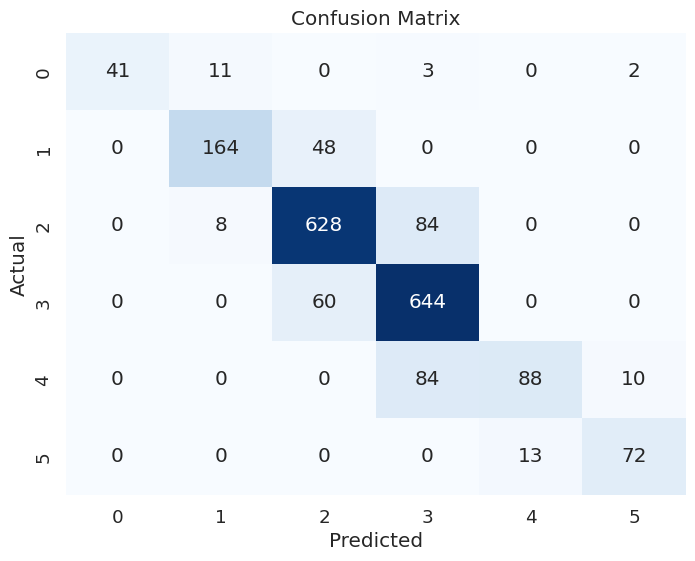

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


##Saving Model

In [261]:
model_name = "logistic_regression_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")

Model 'logistic_regression_model' saved to logistic_regression_model.pkl


##SVM Classification model  

In [262]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Import the SVM classifier
from sklearn.metrics import accuracy_score, classification_report

svm_model = SVC()  # You can specify additional parameters like C, kernel, etc.
svm_model.fit(X_train, y_train)

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

# Generate and print a classification report
report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:\n", report_svm)


SVM Accuracy: 0.91
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        57
         1.0       0.96      0.97      0.96       212
         2.0       0.97      0.91      0.94       720
         3.0       0.84      0.98      0.90       704
         4.0       1.00      0.45      0.62       182
         5.0       0.79      1.00      0.89        85

    accuracy                           0.91      1960
   macro avg       0.92      0.88      0.88      1960
weighted avg       0.92      0.91      0.90      1960



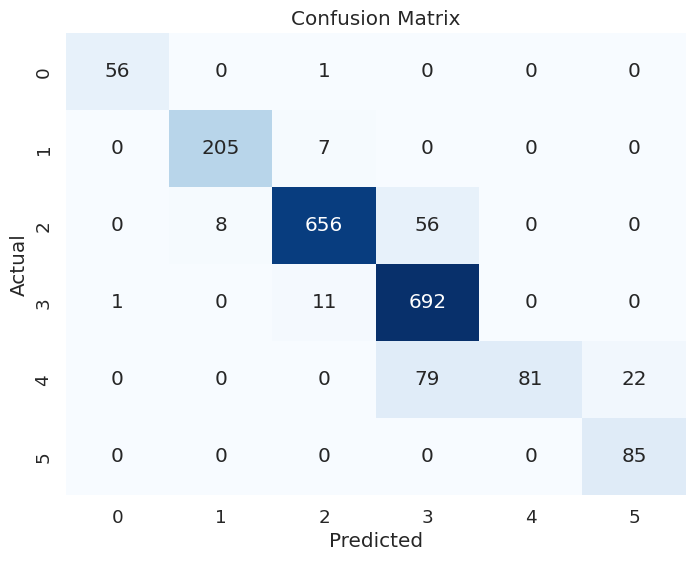

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [264]:
model_name = "svm_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(svm_model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")

Model 'svm_model' saved to svm_model.pkl


##Decision tree classification model

In [265]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  # Import the Decision Tree Classifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded in filtered_train_data, traintarget, filtered_test_data, and testtarget

# Create and fit the Decision Tree Classifier model
dt_model = DecisionTreeClassifier()  # You can specify additional parameters like max_depth, min_samples_split, etc.
dt_model.fit(X_train, y_train)

# Make predictions using the Decision Tree Classifier model
y_pred_dt = dt_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt:.2f}')

# Generate and print a classification report
report_dt = classification_report(y_test, y_pred_dt)
print("Decision Tree Classification Report:\n", report_dt)


Decision Tree Accuracy: 1.00
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00       212
         2.0       1.00      1.00      1.00       720
         3.0       1.00      1.00      1.00       704
         4.0       1.00      1.00      1.00       182
         5.0       1.00      1.00      1.00        85

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960



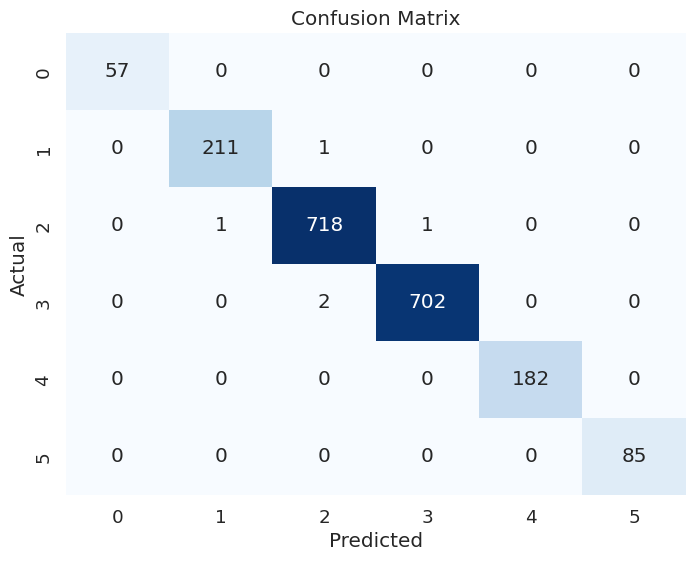

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [267]:
model_name = "decision_tree_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(dt_model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")

Model 'decision_tree_model' saved to decision_tree_model.pkl


## Adaboost Classification Model

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier  # Import the AdaBoost Classifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your data loaded in filtered_train_data, traintarget, filtered_test_data, and testtarget

# Create and fit the AdaBoost Classifier model
adaboost_model = AdaBoostClassifier()  # You can specify additional parameters like base_estimator, n_estimators, etc.
adaboost_model.fit(X_train, y_train)

# Make predictions using the AdaBoost Classifier model
y_pred_adaboost = adaboost_model.predict(X_test)

# Calculate accuracy
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'AdaBoost Accuracy: {accuracy_adaboost:.2f}')

# Generate and print a classification report
report_adaboost = classification_report(y_test, y_pred_adaboost)
print("AdaBoost Classification Report:\n", report_adaboost)


AdaBoost Accuracy: 0.69
AdaBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        57
         1.0       0.00      0.00      0.00       212
         2.0       0.60      0.92      0.73       720
         3.0       0.87      0.72      0.79       704
         4.0       0.66      1.00      0.80       182
         5.0       0.00      0.00      0.00        85

    accuracy                           0.69      1960
   macro avg       0.36      0.44      0.39      1960
weighted avg       0.60      0.69      0.62      1960



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


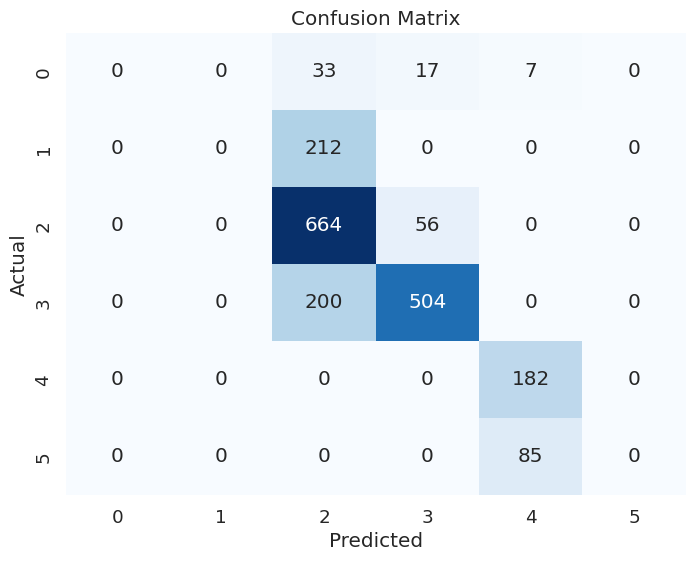

In [269]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [270]:
model_name = "adaboost_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(adaboost_model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")

Model 'adaboost_model' saved to adaboost_model.pkl


In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier()  # You can specify additional parameters like n_estimators, max_depth, etc.
rf_model.fit(X_train, y_train)

# Make predictions using the Random Forest Classifier model
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Generate and print a classification report for Random Forest
report_rf = classification_report(y_test, y_pred_rf)
print("Random Forest Classification Report:\n", report_rf)

gb_model = GradientBoostingClassifier()  # You can specify additional parameters like n_estimators, learning_rate, max_depth, etc.
gb_model.fit(X_train, y_train)

# Make predictions using the Gradient Boosting Classifier model
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

# Generate and print a classification report for Gradient Boosting
report_gb = classification_report(y_test, y_pred_gb)
print("Gradient Boosting Classification Report:\n", report_gb)


Random Forest Accuracy: 1.00
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00       212
         2.0       1.00      1.00      1.00       720
         3.0       1.00      1.00      1.00       704
         4.0       1.00      1.00      1.00       182
         5.0       1.00      1.00      1.00        85

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

Gradient Boosting Accuracy: 1.00
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        57
         1.0       1.00      1.00      1.00       212
         2.0       1.00      1.00      1.00       720
         3.0       1.00      1.00      1.00       704
         4.0       1.00      1.00      1.00 

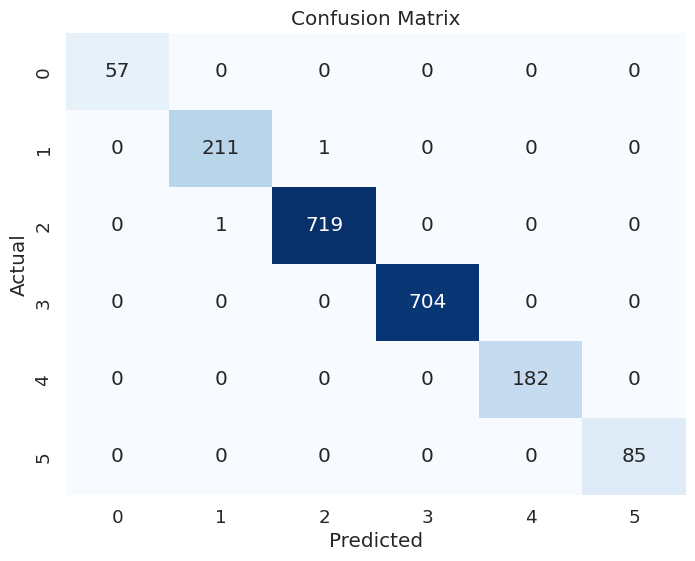

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


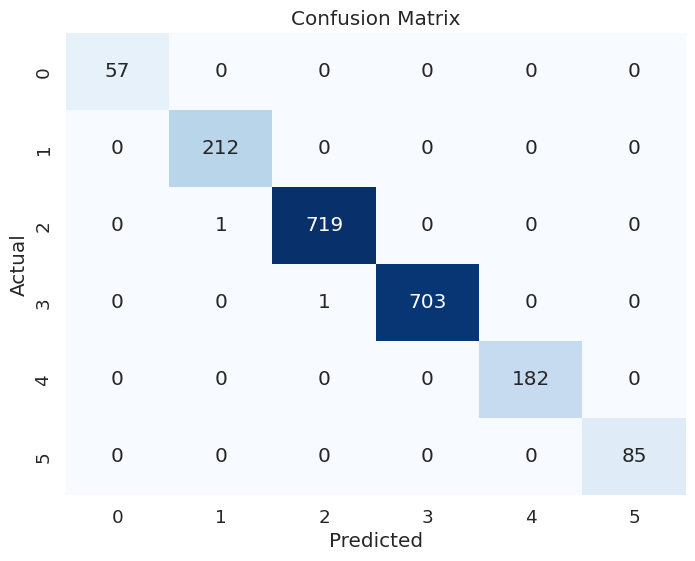

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mat = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [274]:
model_name = "random_forest_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(rf_model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")



model_name = "gradient_boosting_model"
model_filename = f"{model_name}.pkl"

# Save the model to the file with the custom name
joblib.dump(gb_model, model_filename)

print(f"Model '{model_name}' saved to {model_filename}")

Model 'random_forest_model' saved to random_forest_model.pkl
Model 'gradient_boosting_model' saved to gradient_boosting_model.pkl
